In [1]:
%matplotlib notebook

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


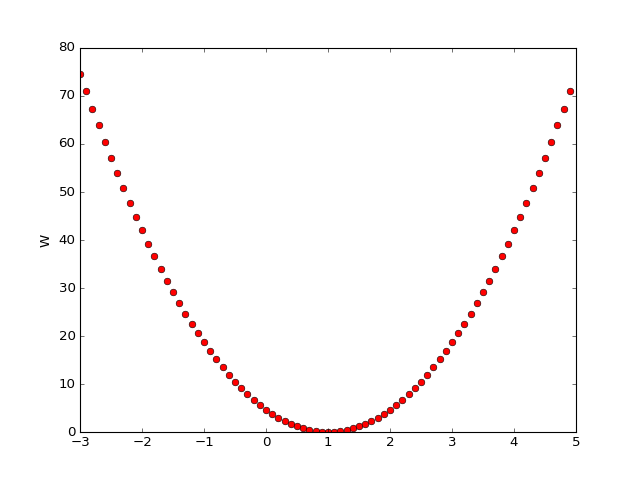

In [2]:
X = [1. , 2., 3.]
Y = [1. , 2., 3.]


W = tf.placeholder(tf.float32)

hypothesis = tf.mul(X, W)
cost = tf.reduce_mean(tf.pow(hypothesis-Y,2)) 
init = tf.initialize_all_variables()

W_val = []
cost_val = []

sess = tf.Session()
sess.run(init)

for i in range(-30, 50):
    W_val.append(i*0.1)
    cost_val.append(sess.run(cost, feed_dict={W: i * 0.1 }))

plt.plot(W_val, cost_val, "ro")
plt.ylabel('Cost')
plt.ylabel('W')
plt.show()

<IPython.core.display.Javascript object>


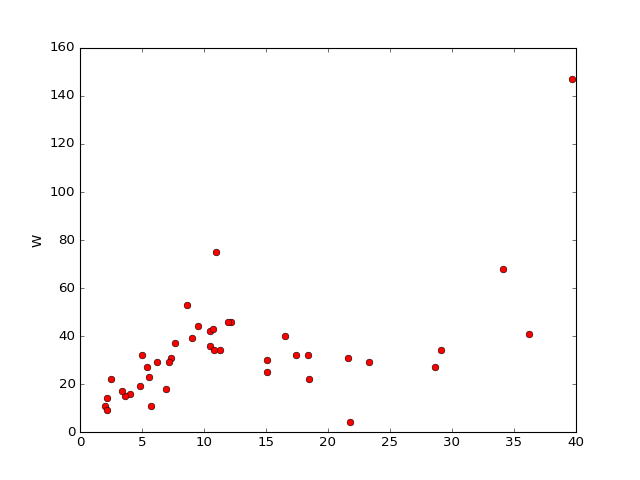

In [3]:
import tensorflow as tf

raw_data = np.loadtxt('./data/unemployment.csv', 
           delimiter=',', usecols=(0,1), 
           unpack=True, dtype=float, skiprows=1)

x_data = raw_data[0]
y_data = raw_data[1]

plt.plot(x_data, y_data, "ro")
plt.ylabel('Cost')
plt.ylabel('W')
plt.show()

In [4]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

a = tf.Variable(0.0001)
optimizer = tf.train.GradientDescentOptimizer(a)
train = optimizer.minimize(cost)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for step in range(150000):
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    if step % 25000 == 0:
        print (step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))

W_val = sess.run(W)
b_val = sess.run(b)

print (step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W), sess.run(b))


0 842.341 [ 0.88048977] [ 0.94038743]
25000 363.33 [ 1.44617653] [ 14.36031246]
50000 360.888 [ 1.33532262] [ 16.56103706]
75000 360.822 [ 1.31707716] [ 16.92328262]
100000 360.82 [ 1.31412244] [ 16.98193169]
125000 360.82 [ 1.31412244] [ 16.98193169]
149999 360.82 [ 1.31412244] [ 16.98193169]


<IPython.core.display.Javascript object>


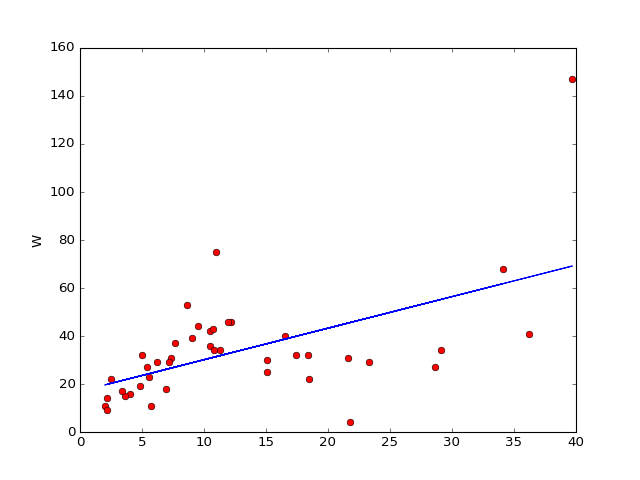

In [5]:
plt.plot(x_data, y_data, "ro")
plt.plot(x_data, x_data * W_val + b_val)
plt.ylabel('Cost')
plt.ylabel('W')
plt.show()